<a href="https://colab.research.google.com/github/arya-arya/ML/blob/main/ML_prjt_2_nasaearthobject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HAZARDOUS ASTEROID PREDICTION NEAR EARTH**

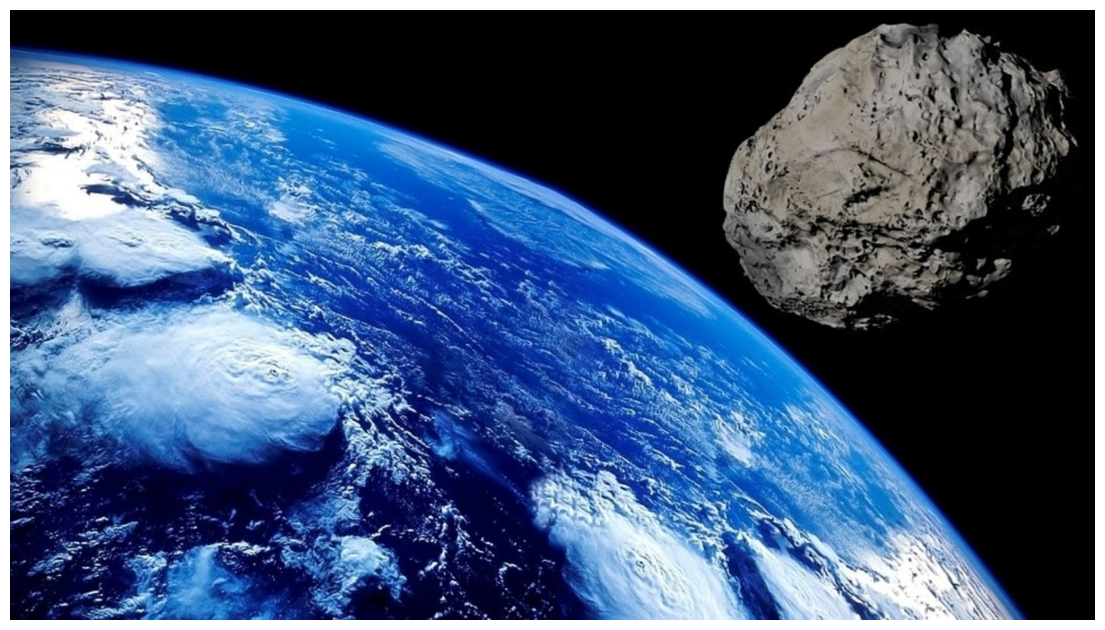

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize = (14 , 14))
img = mpimg.imread('/content/nasa11.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

## About the dataset

This dataset contains information about asteroids orbiting earth. It is important to understand objects close to earth, as they can impact the earth in many ways and distrupt the earths natural phenomena. Information about the size, relative velocity, distance from earths orbit, sentry object and the magnitude of the luminosity of the asteroid can help experts identify whether an asteroid poses a threat or not. There are many asteroids which are nearer to the earth, but all are not hazardous. So, the target in this project is to predict the asteroids is dangerous for the earth or not, and attempt to create a model to predict whether or not an asteroid is potentially hazardous.

The attributes of this dataset are:



*   id : identifier (the same object can have several rows in the dataset, as it has been observed multiple times)


*   name : name given by NASA (including the year the asteroid was discovered)


*   est_diameter_min : minimum estimated diameter in kilometers


*   est_diameter_max : maximum estimated diameter in kilometers

*   relative_velocity : velocity relative to earth



*  miss_distance : distance in kilometers it misses Earth



*   orbiting_body : planet that the asteroid orbits



*   sentry_object : whether it is included in sentry - an automated collision monitoring system


*   absolute_magnitude : intrinsic luminosity

*   hazardous : whether the asteriod is potentially harmful or not

This dataset has 10 columns and 31249 rows.















##Importing Necessery Libraries


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve,auc


import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


##Loading Dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Prjt/Book1.csv')
df

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.24922,54839744.08,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.72666,61438126.52,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.69210,49798724.94,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.30314,25434972.72,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.73376,46275567.00,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
31244,3555205,(2011 AN37),0.016016,0.035813,21836.41872,49160731.52,Earth,False,26.10,False
31245,3759677,(2016 NO56),0.019256,0.043057,89738.03415,67191750.95,Earth,False,25.70,False
31246,3789432,(2017 WE),0.012149,0.027167,71113.18756,39816595.53,Earth,False,26.70,False
31247,54016975,(2020 JU),0.181366,0.405546,30152.85634,26886722.02,Earth,False,20.83,True


## Informations of the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31249 entries, 0 to 31248
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  31249 non-null  int64  
 1   name                31249 non-null  object 
 2   est_diameter_min    31165 non-null  float64
 3   est_diameter_max    31188 non-null  float64
 4   relative_velocity   31110 non-null  float64
 5   miss_distance       31094 non-null  float64
 6   orbiting_body       31249 non-null  object 
 7   sentry_object       31249 non-null  bool   
 8   absolute_magnitude  31249 non-null  float64
 9   hazardous           31249 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 2.0+ MB


## The Diamension

In [ ]:
df.shape

(31249, 10)

## Printing first 5 rows of the dataset

In [ ]:
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.24922,54839744.08,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.72666,61438126.52,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.69210,49798724.94,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.30314,25434972.72,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.73376,46275567.00,Earth,False,20.09,True


## Printing last 5 rows of the dataset

In [ ]:
df.tail()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
31244,3555205,(2011 AN37),0.016016,0.035813,21836.41872,49160731.52,Earth,False,26.10,False
31245,3759677,(2016 NO56),0.019256,0.043057,89738.03415,67191750.95,Earth,False,25.70,False
31246,3789432,(2017 WE),0.012149,0.027167,71113.18756,39816595.53,Earth,False,26.70,False
31247,54016975,(2020 JU),0.181366,0.405546,30152.85634,26886722.02,Earth,False,20.83,True
31248,2613913,613913 (2007 XB10),0.766576,1.714115,92550.24642,10685361.29,Earth,False,17.70,False


## Checking for Duplicate values

In [ ]:
df.duplicated().sum()

0

## Checking the unique values of each attribute

In [ ]:
df['orbiting_body'].value_counts()


orbiting_body
Earth    31249
Name: count, dtype: int64

In [ ]:
df['sentry_object'].value_counts()

sentry_object
False    31249
Name: count, dtype: int64

## Remove Irrelevent Columns

In [ ]:
#if there is only 1 unique value the column is useless

df.drop(['id','name','orbiting_body','sentry_object'],axis=1,inplace=True)
df

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.24922,54839744.08,16.73,False
1,0.265800,0.594347,73588.72666,61438126.52,20.00,True
2,0.722030,1.614507,114258.69210,49798724.94,17.83,False
3,0.096506,0.215794,24764.30314,25434972.72,22.20,False
4,0.255009,0.570217,42737.73376,46275567.00,20.09,True
...,...,...,...,...,...,...
31244,0.016016,0.035813,21836.41872,49160731.52,26.10,False
31245,0.019256,0.043057,89738.03415,67191750.95,25.70,False
31246,0.012149,0.027167,71113.18756,39816595.53,26.70,False
31247,0.181366,0.405546,30152.85634,26886722.02,20.83,True


## Checking for Missing values

In [ ]:
df.isna().sum()

est_diameter_min       84
est_diameter_max       61
relative_velocity     139
miss_distance         155
absolute_magnitude      0
hazardous               0
dtype: int64

## Filling Missing Values

In [ ]:
df['est_diameter_min']=df['est_diameter_min'].fillna(df['est_diameter_min'].median())
df['est_diameter_max']=df['est_diameter_max'].fillna(df['est_diameter_max'].median())
df['relative_velocity']=df['relative_velocity'].fillna(df['relative_velocity'].median())
df['miss_distance']=df['miss_distance'].fillna(df['miss_distance'].median())

In [ ]:
df.isna().sum()

est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
absolute_magnitude    0
hazardous             0
dtype: int64

## Some statistical observation of the data

In [ ]:
df.describe()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,31249.000000,31249.000000,31249.000000,3.124900e+04,31249.000000
mean,0.149858,0.335195,50354.809204,4.140270e+07,23.148947
std,0.292469,0.653973,25743.602588,2.086199e+07,2.965721
min,0.000609,0.001362,561.695602,1.263816e+04,10.310000
25%,0.022108,0.049436,30592.511180,2.485169e+07,20.860000
50%,0.062310,0.139329,46879.165555,4.305394e+07,23.150000
75%,0.176423,0.394494,65511.127900,5.945863e+07,25.400000
max,23.043847,51.527608,193386.975200,7.479529e+07,33.200000


## Checking Datatype of each attribute


In [ ]:
df.dtypes

est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
absolute_magnitude    float64
hazardous                bool
dtype: object

## Converting Object type value to Numeric values

In [ ]:
encoder=LabelEncoder()
df['hazardous']=encoder.fit_transform(df['hazardous'])
df

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.24922,54839744.08,16.73,0
1,0.265800,0.594347,73588.72666,61438126.52,20.00,1
2,0.722030,1.614507,114258.69210,49798724.94,17.83,0
3,0.096506,0.215794,24764.30314,25434972.72,22.20,0
4,0.255009,0.570217,42737.73376,46275567.00,20.09,1
...,...,...,...,...,...,...
31244,0.016016,0.035813,21836.41872,49160731.52,26.10,0
31245,0.019256,0.043057,89738.03415,67191750.95,25.70,0
31246,0.012149,0.027167,71113.18756,39816595.53,26.70,0
31247,0.181366,0.405546,30152.85634,26886722.02,20.83,1


In [ ]:
df.dtypes

est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
absolute_magnitude    float64
hazardous               int64
dtype: object

## Spliting Training and Test Data

In [ ]:
X=df.iloc[:,:-1]
X

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,1.198271,2.679415,13569.24922,54839744.08,16.73
1,0.265800,0.594347,73588.72666,61438126.52,20.00
2,0.722030,1.614507,114258.69210,49798724.94,17.83
3,0.096506,0.215794,24764.30314,25434972.72,22.20
4,0.255009,0.570217,42737.73376,46275567.00,20.09
...,...,...,...,...,...
31244,0.016016,0.035813,21836.41872,49160731.52,26.10
31245,0.019256,0.043057,89738.03415,67191750.95,25.70
31246,0.012149,0.027167,71113.18756,39816595.53,26.70
31247,0.181366,0.405546,30152.85634,26886722.02,20.83


In [ ]:
y=df.iloc[:,-1]
y

0        0
1        1
2        0
3        0
4        1
        ..
31244    0
31245    0
31246    0
31247    1
31248    0
Name: hazardous, Length: 31249, dtype: int64

## Scaling Data

In [ ]:
scaler=StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 3.58475638,  3.58464   , -1.42894331,  0.64410273, -2.16441457],
       [ 0.39643175,  0.39627958,  0.90252672,  0.96039511, -1.06179825],
       [ 1.95638187,  1.95624721,  2.48236063,  0.40246231, -1.79350388],
       ...,
       [-0.47085593, -0.47101785,  0.80636385, -0.07602942,  1.19738503],
       [ 0.10773188,  0.10757647, -0.78474938, -0.69582078, -0.78192928],
       [ 2.10869458,  2.10856163,  1.6390912 , -1.47243034, -1.83733878]])

## Seperating dataset into training and test data

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

## Model Creation And Performance Evaluation

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      8264
           1       0.43      0.45      0.44      1111

    accuracy                           0.87      9375
   macro avg       0.68      0.68      0.68      9375
weighted avg       0.87      0.87      0.87      9375

86.54933333333334
________________________________________________________________________________________________________________________________________________________________________________________________________
KNeighborsClassifier(n_neighbors=1)
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      8264
           1       0.40      0.40      0.40      1111

    accuracy                           0.86      9375
   macro avg       0.66      0.66      0.66      9375
weighted avg       0.86      0.86      0.86      9375

85.76
____________________________________________________________

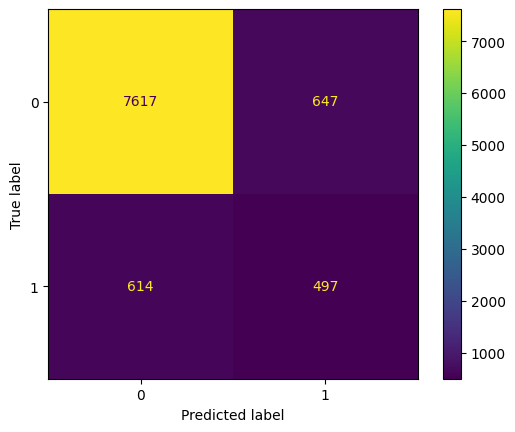

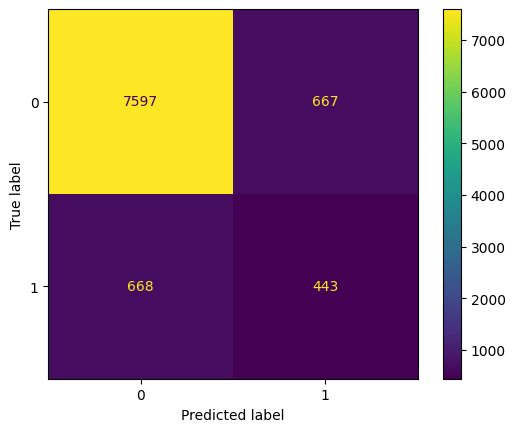

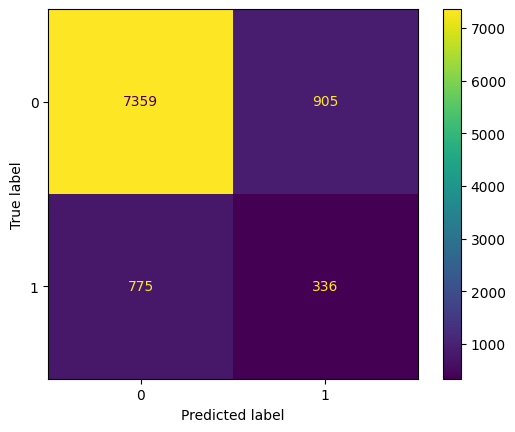

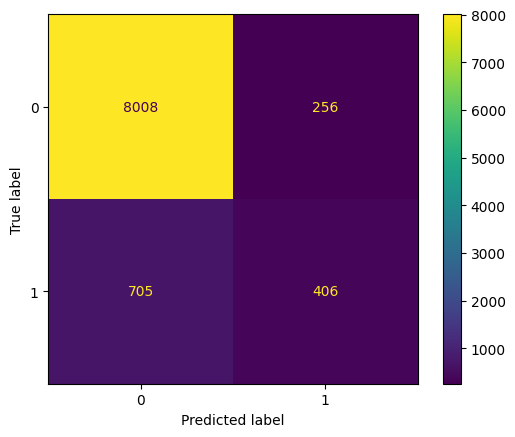

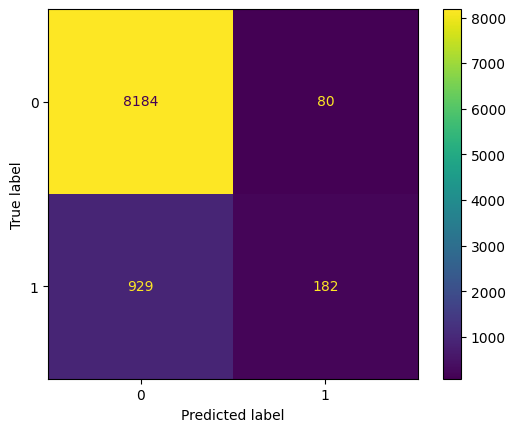

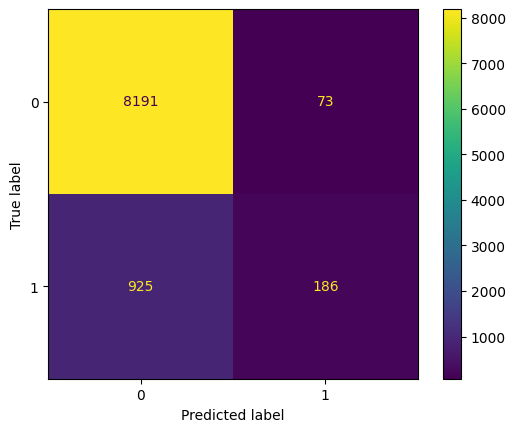

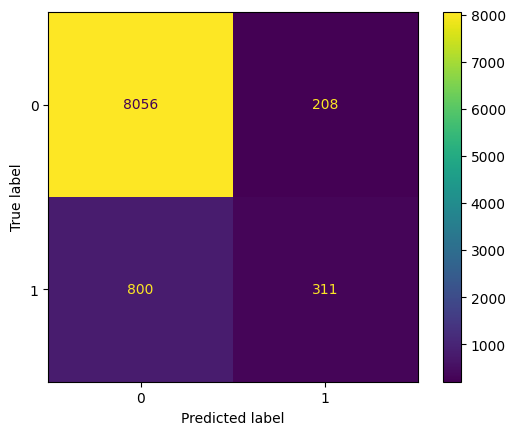

In [ ]:
dec=DecisionTreeClassifier()
knn=KNeighborsClassifier(n_neighbors=1)
nb=GaussianNB()
rf=RandomForestClassifier(random_state=1,criterion='entropy')  #max_leaf_nodes=15
ab=AdaBoostClassifier(random_state=1)
gb=GradientBoostingClassifier(random_state=1)
xg=XGBClassifier(random_state=1)
accuracy_scores=[]


models=[dec,knn,nb,rf,ab,gb,xg]
for model in models:
  print(model)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
  accuracy=accuracy_score(y_test,y_pred)*100
  print(accuracy)
  accuracy_scores.append(accuracy)
  print('_'*200)

# Checking the correlation between different features

In [ ]:
df.corr()['hazardous']

est_diameter_min      0.184903
est_diameter_max      0.184756
relative_velocity     0.179479
miss_distance        -0.020861
absolute_magnitude   -0.356054
hazardous             1.000000
Name: hazardous, dtype: float64

In [ ]:
df.drop(['miss_distance'],axis=1,inplace=True)
df

,est_diameter_min,est_diameter_max,relative_velocity,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.24922,16.73,0
1,0.265800,0.594347,73588.72666,20.00,1
2,0.722030,1.614507,114258.69210,17.83,0
3,0.096506,0.215794,24764.30314,22.20,0
4,0.255009,0.570217,42737.73376,20.09,1
...,...,...,...,...,...
31244,0.016016,0.035813,21836.41872,26.10,0
31245,0.019256,0.043057,89738.03415,25.70,0
31246,0.012149,0.027167,71113.18756,26.70,0
31247,0.181366,0.405546,30152.85634,20.83,1


<Axes: title={'center': 'Correlation Matrix'}>

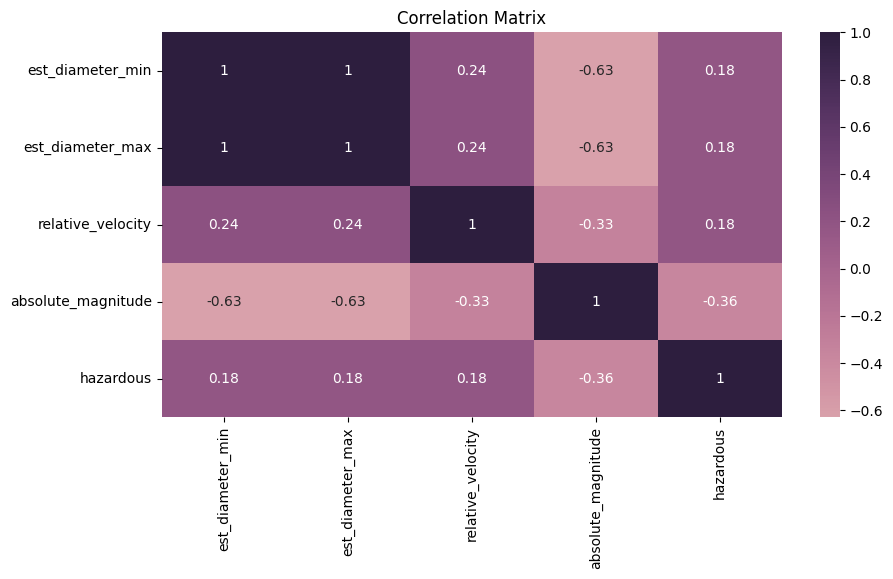

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Correlation Matrix')
cmap = sns.cubehelix_palette(dark=0.15, light=0.70, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap=cmap)


## seperating features from class label

In [ ]:
X=df.drop(['hazardous'],axis=1)
X

,est_diameter_min,est_diameter_max,relative_velocity,absolute_magnitude
0,1.198271,2.679415,13569.24922,16.73
1,0.265800,0.594347,73588.72666,20.00
2,0.722030,1.614507,114258.69210,17.83
3,0.096506,0.215794,24764.30314,22.20
4,0.255009,0.570217,42737.73376,20.09
...,...,...,...,...
31244,0.016016,0.035813,21836.41872,26.10
31245,0.019256,0.043057,89738.03415,25.70
31246,0.012149,0.027167,71113.18756,26.70
31247,0.181366,0.405546,30152.85634,20.83


In [ ]:
y=df['hazardous']
y

0        0
1        1
2        0
3        0
4        1
        ..
31244    0
31245    0
31246    0
31247    1
31248    0
Name: hazardous, Length: 31249, dtype: int64

## Scaling Data

In [ ]:
scaler1=StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 3.58475638,  3.58464   , -1.42894331, -2.16441457],
       [ 0.39643175,  0.39627958,  0.90252672, -1.06179825],
       [ 1.95638187,  1.95624721,  2.48236063, -1.79350388],
       ...,
       [-0.47085593, -0.47101785,  0.80636385,  1.19738503],
       [ 0.10773188,  0.10757647, -0.78474938, -0.78192928],
       [ 2.10869458,  2.10856163,  1.6390912 , -1.83733878]])

## Seperating dataset into training and test data

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

## Building models and evaluating its performance:

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      8264
           1       0.42      0.42      0.42      1111

    accuracy                           0.86      9375
   macro avg       0.67      0.67      0.67      9375
weighted avg       0.86      0.86      0.86      9375

86.272
________________________________________________________________________________________________________________________________________________________________________________________________________
KNeighborsClassifier(n_neighbors=1)
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      8264
           1       0.38      0.38      0.38      1111

    accuracy                           0.85      9375
   macro avg       0.65      0.65      0.65      9375
weighted avg       0.85      0.85      0.85      9375

85.248
______________________________________________________________________

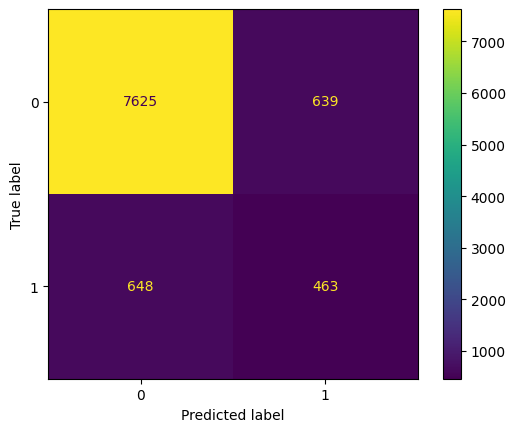

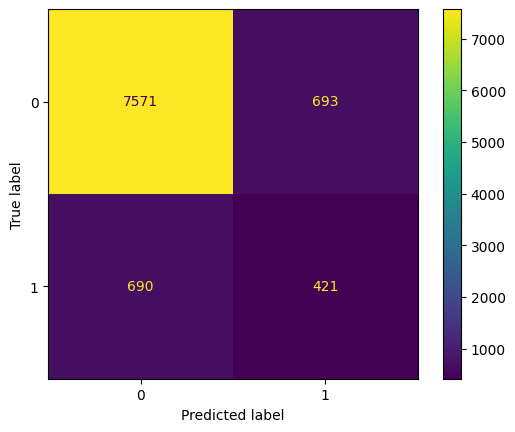

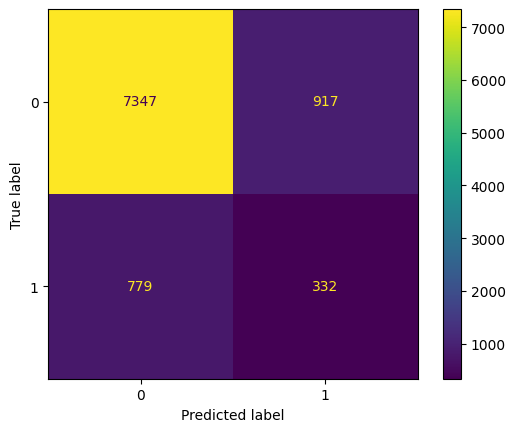

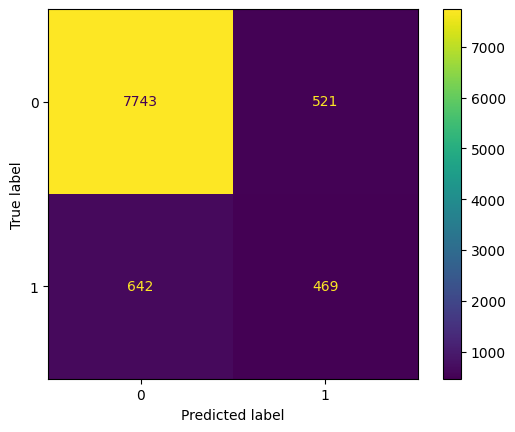

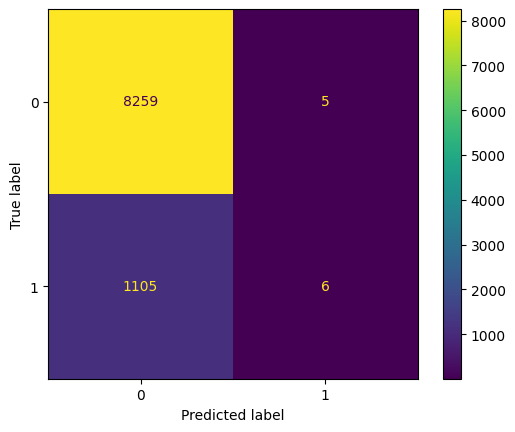

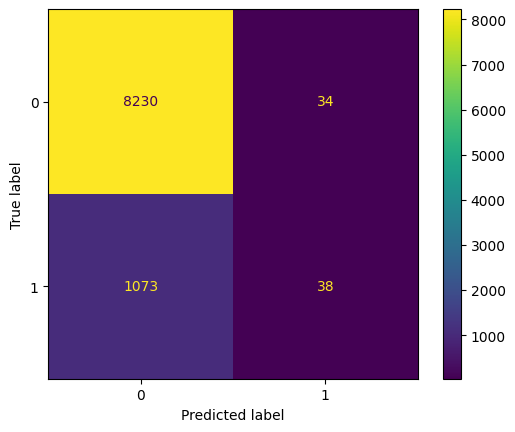

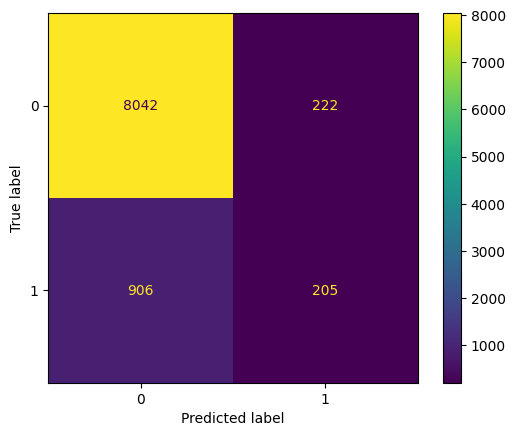

In [ ]:
dec=DecisionTreeClassifier()
knn=KNeighborsClassifier(n_neighbors=1)
nb=GaussianNB()
rf=RandomForestClassifier(random_state=1,criterion='entropy')  #max_leaf_nodes=15
ab=AdaBoostClassifier(random_state=1)
gb=GradientBoostingClassifier(random_state=1)
xg=XGBClassifier(random_state=1)
accuracy_scores1=[]


models=[dec,knn,nb,rf,ab,gb,xg]
for model in models:
  print(model)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
  accuracy1=accuracy_score(y_test,y_pred)*100
  print(accuracy1)
  accuracy_scores1.append(accuracy1)
  print('_'*200)

## Check tha dataset is Balanced or Imbalanced

In [ ]:
y.value_counts()

hazardous
0    27534
1     3715
Name: count, dtype: int64

# Balancing the dataset by Oversampling

In [ ]:
os=SMOTE(random_state=1)
X_os,y_os=os.fit_resample(X,y)

Checking the shape of oversampled dataset

In [ ]:
X_os.shape,y_os.shape

((55068, 4), (55068,))

In [ ]:
y_os.value_counts()

hazardous
0    27534
1    27534
Name: count, dtype: int64

## Scaling the oversampled dataset

In [ ]:
scaler2=MinMaxScaler()
X_os=scaler2.fit_transform(X_os)
X_os

array([[0.05197455, 0.05197455, 0.06745772, 0.28047182],
       [0.01150841, 0.01150841, 0.37872125, 0.42332896],
       [0.03130726, 0.03130726, 0.5896374 , 0.32852774],
       ...,
       [0.02216207, 0.02216207, 0.21552759, 0.36126785],
       [0.00475533, 0.00475533, 0.3850901 , 0.50687496],
       [0.00481014, 0.00481014, 0.47037863, 0.50578517]])

## Splitting the oversampled dataset into training and testing

In [ ]:
X_train_os,X_test_os,y_train_os,y_test_os=train_test_split(X_os,y_os,test_size=0.3,random_state=1)

## Building ML models on oversampled data and evaluating its performance

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      8373
           1       0.88      0.90      0.89      8148

    accuracy                           0.89     16521
   macro avg       0.89      0.89      0.89     16521
weighted avg       0.89      0.89      0.89     16521

89.12898734943406
________________________________________________________________________________________________________________________________________________________________________________________________________
KNeighborsClassifier(n_neighbors=1)
              precision    recall  f1-score   support

           0       0.90      0.85      0.87      8373
           1       0.85      0.90      0.88      8148

    accuracy                           0.87     16521
   macro avg       0.88      0.88      0.87     16521
weighted avg       0.88      0.87      0.87     16521

87.47049210096242
________________________________________________

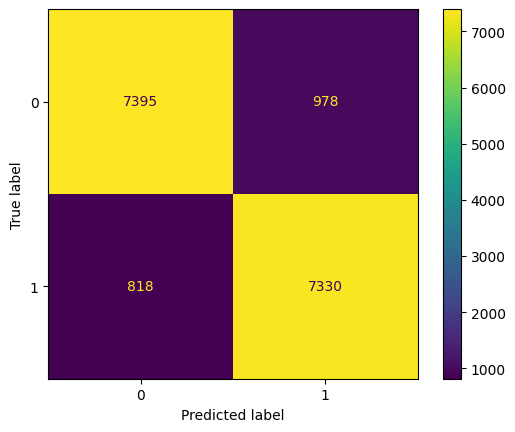

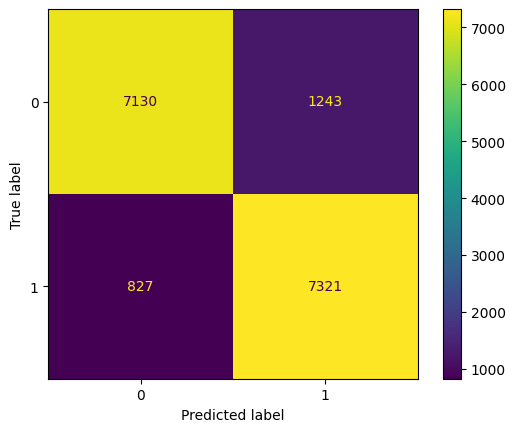

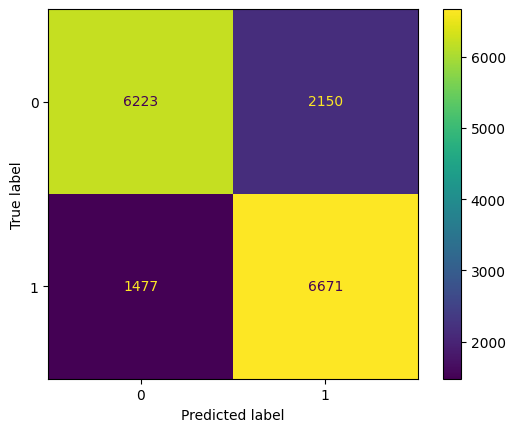

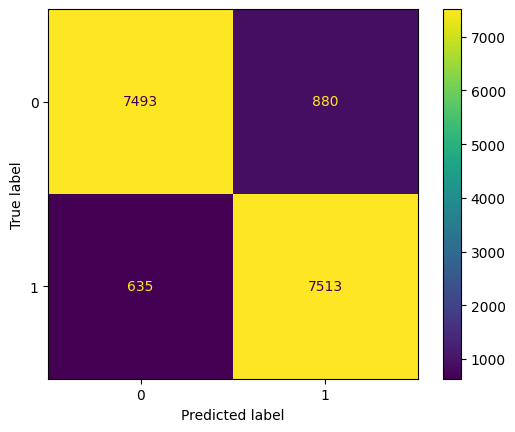

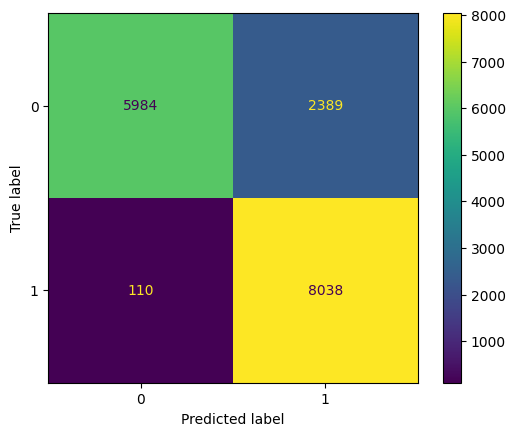

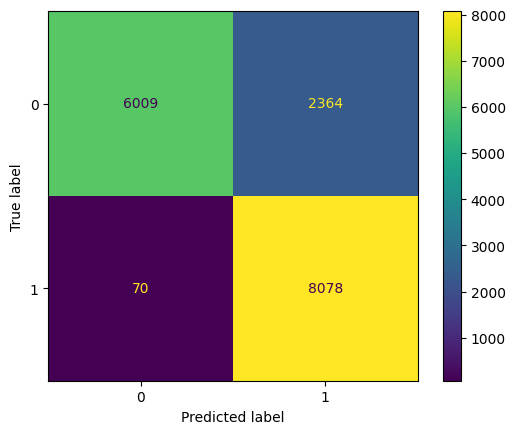

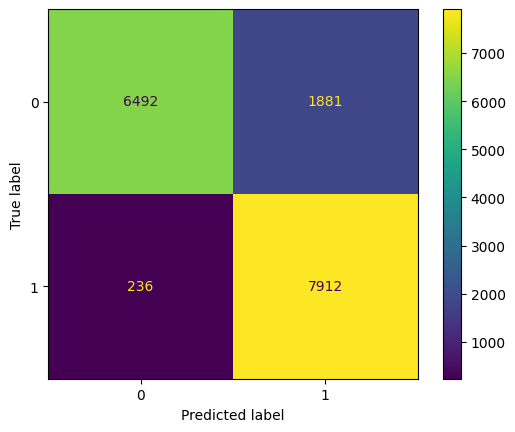

In [ ]:
dec_os=DecisionTreeClassifier()
knn_os=KNeighborsClassifier(n_neighbors=1)
nb_os=GaussianNB()
rf_os=RandomForestClassifier(random_state=1)
ab_os=AdaBoostClassifier(random_state=1)
gb_os=GradientBoostingClassifier(random_state=1)
xg_os=XGBClassifier(random_state=1)
accuracy_scores_os=[]


models=[dec_os,knn_os,nb_os,rf_os,ab_os,gb_os,xg_os]
for model in models:
  print(model)
  model.fit(X_train_os,y_train_os)
  y_pred_os=model.predict(X_test_os)
  print(classification_report(y_test_os,y_pred_os))
  print(ConfusionMatrixDisplay.from_predictions(y_test_os,y_pred_os))
  accuracy_os=accuracy_score(y_test_os,y_pred_os)*100
  print(accuracy_os)
  accuracy_scores_os.append(accuracy_os)
  print('_'*200)

# Undersampling

In [ ]:
us=RandomUnderSampler()
X_us,y_us=us.fit_resample(X,y)

## Checking the shape

In [ ]:
X_us.shape,y_us.shape

((7430, 4), (7430,))

In [ ]:
y_us.value_counts()

hazardous
0    3715
1    3715
Name: count, dtype: int64

## Scaling the undersampled dataset

In [ ]:
scaler3=MinMaxScaler()
X_us=scaler3.fit_transform(X_us)
X_us

array([[0.05970541, 0.05970541, 0.32091424, 0.34558824],
       [0.00607865, 0.00607865, 0.147925  , 0.62104072],
       [0.04585403, 0.04585403, 0.32625766, 0.37782805],
       ...,
       [0.07989999, 0.07989999, 0.39783649, 0.30995475],
       [0.08927139, 0.08927139, 0.2675481 , 0.29638009],
       [0.04317252, 0.04317252, 0.14948018, 0.385181  ]])

## Splitting the undersampled dataset into training and testing

In [ ]:
X_train_us,X_test_us,y_train_us,y_test_us=train_test_split(X_us,y_us,test_size=0.3,random_state=1)

## Building ML models on undersampled data and evaluating its performance

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1098
           1       0.78      0.76      0.77      1131

    accuracy                           0.77      2229
   macro avg       0.77      0.77      0.77      2229
weighted avg       0.77      0.77      0.77      2229

76.94033198743831
________________________________________________________________________________________________________________________________________________________________________________________________________
KNeighborsClassifier(n_neighbors=1)
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1098
           1       0.76      0.76      0.76      1131

    accuracy                           0.76      2229
   macro avg       0.76      0.76      0.76      2229
weighted avg       0.76      0.76      0.76      2229

75.54957379991028
________________________________________________

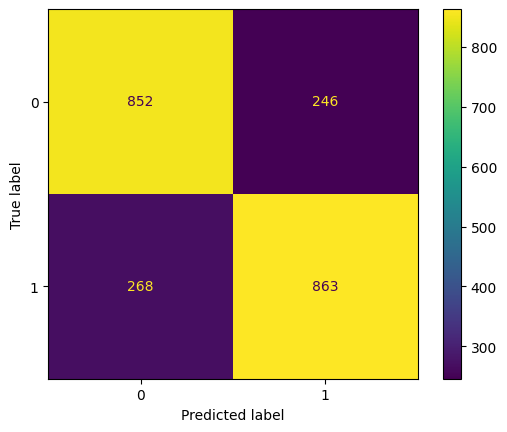

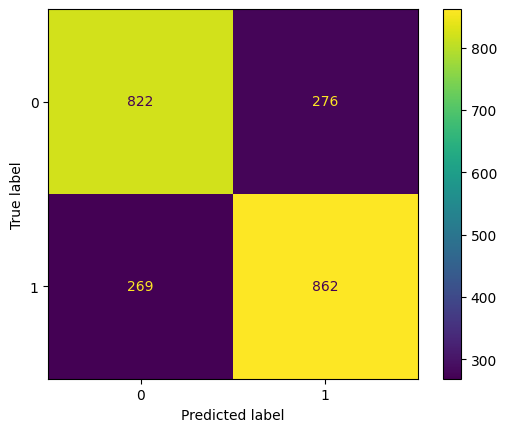

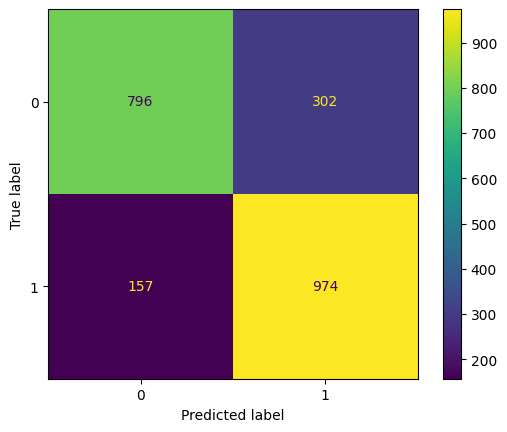

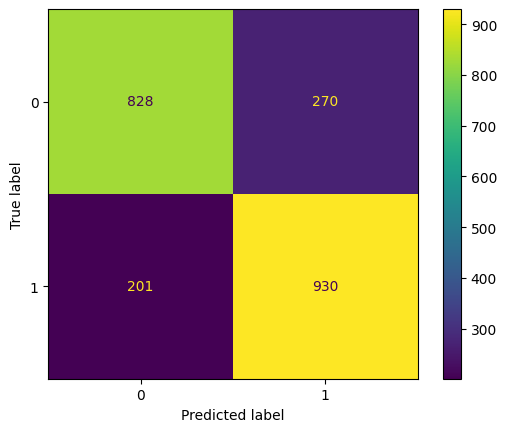

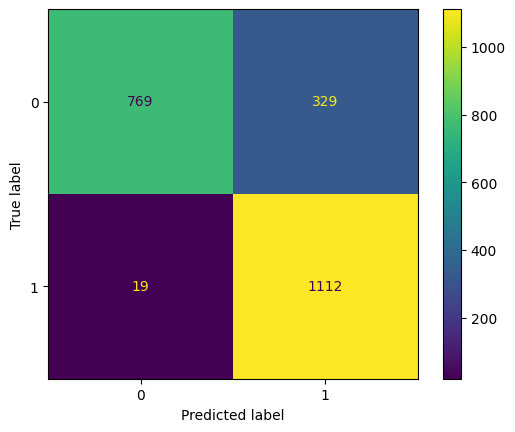

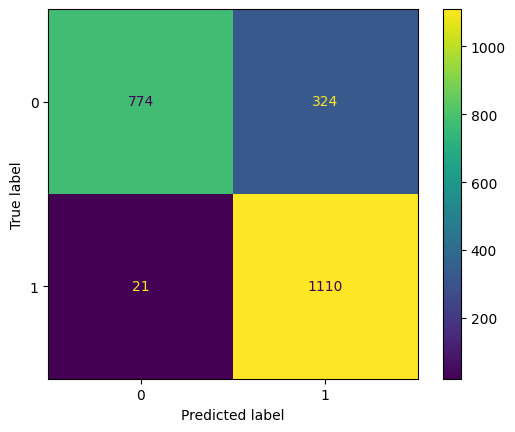

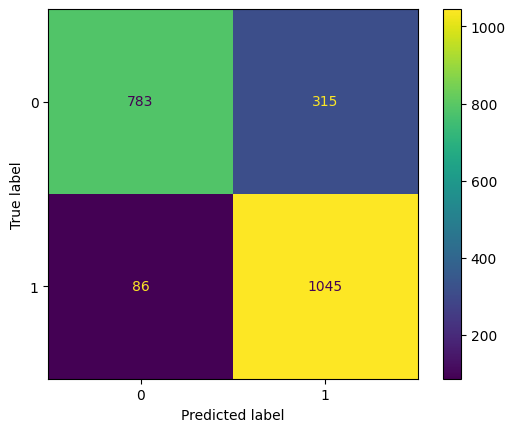

In [ ]:
dec_us=DecisionTreeClassifier()
knn_us=KNeighborsClassifier(n_neighbors=1)
nb_us=GaussianNB()
rf_us=RandomForestClassifier(random_state=1)
ab_us=AdaBoostClassifier(random_state=1)
gb_us=GradientBoostingClassifier(random_state=1)
xg_us=XGBClassifier(random_state=1)
accuracy_scores_us=[]


models=[dec_us,knn_us,nb_us,rf_us,ab_us,gb_us,xg_us]
for model in models:
  print(model)
  model.fit(X_train_us,y_train_us)
  y_pred_us=model.predict(X_test_us)
  print(classification_report(y_test_us,y_pred_us))
  print(ConfusionMatrixDisplay.from_predictions(y_test_us,y_pred_us))
  accuracy_us=accuracy_score(y_test_us,y_pred_us)*100
  print(accuracy_us)
  accuracy_scores_us.append(accuracy_us)
  print('_'*200)

## Comparing Accuracy Score

In [ ]:
models=['DecisionTreeClassifier()','KNeighborsClassifier()','GaussianNB()','RandomForestClassifier()','AdaBoostClassifier()','GradientBoostingClassifier()','XGBClassifier()']
result=pd.DataFrame({"Models":models,"Accuracy":accuracy_scores,"Accuracy1":accuracy_scores1,"Accuracy_os":accuracy_scores_os,"Accuracy_us":accuracy_scores_us})
result

,Models,Accuracy,Accuracy1,Accuracy_os,Accuracy_us
0,DecisionTreeClassifier(),86.549333,86.272000,89.128987,76.940332
1,KNeighborsClassifier(),85.760000,85.248000,87.470492,75.549574
2,GaussianNB(),82.080000,81.909333,78.046123,79.407806
3,RandomForestClassifier(),89.749333,87.594667,90.829853,78.869448
4,AdaBoostClassifier(),89.237333,88.160000,84.873797,84.387618
5,GradientBoostingClassifier(),89.354667,88.192000,85.267236,84.522207
6,XGBClassifier(),89.248000,87.968000,87.186006,82.009870


## Comparison Diagram

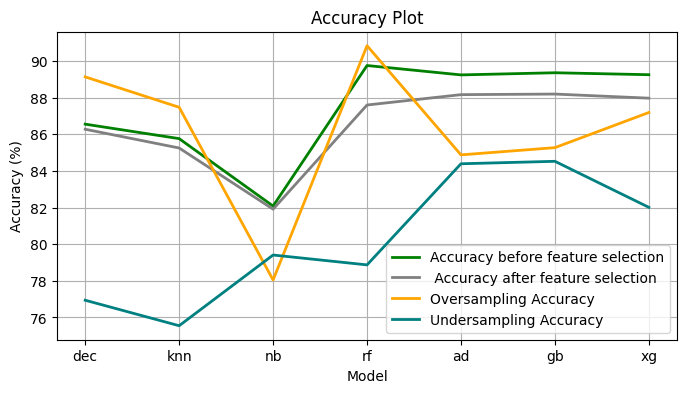

In [ ]:
plt.figure(figsize=(8,4))
modls=('dec','knn','nb','rf','ad','gb','xg')
plt.plot(modls,accuracy_scores,color='green',linewidth=2)
plt.plot(modls,accuracy_scores1,color='grey',linewidth=2)
plt.plot(modls,accuracy_scores_os,color='orange',linewidth=2)
plt.plot(modls,accuracy_scores_us,color='teal',linewidth=2)
plt.title("Accuracy Plot")
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.legend(["Accuracy before feature selection", " Accuracy after feature selection","Oversampling Accuracy ","Undersampling Accuracy"], loc="best")

plt.show()



# Hyperparameter Tuning - RandomForestClassifier

In [ ]:
params={'n_estimators':[20,40,80,100],'criterion':['gini','entropy','log_loss'],'max_features':['sqrt','log2',None]}
clf=RandomizedSearchCV(rf_os,params,cv=10,scoring='accuracy')
clf.fit(X_train_os,y_train_os)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_features': ['sqrt', 'log2', None],
                                        'n_estimators': [20, 40, 80, 100]},
                   scoring='accuracy')

## checking the best parameter

In [ ]:
clf.best_params_

{'n_estimators': 100, 'max_features': 'log2', 'criterion': 'entropy'}

## Evlauating the performance of Hyperparameter tunning


In [ ]:
y_pred1=clf.predict(X_test_os)
y_pred1
print(classification_report(y_test_os,y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      8373
           1       0.90      0.92      0.91      8148

    accuracy                           0.91     16521
   macro avg       0.91      0.91      0.91     16521
weighted avg       0.91      0.91      0.91     16521



##   AUC-ROC Curve

The AUC-ROC curve, or Area Under the Receiver Operating Characterstic curve, is a graphical repersentation of the performance of binary clssification model at varoius classification thresholds.





In [ ]:
y_scores=rf.predict_proba(X_test)[:,1]
y_true=y_test
fpr,tpr,_=roc_curve(y_true,y_scores)
roc_auc=auc(fpr,tpr)

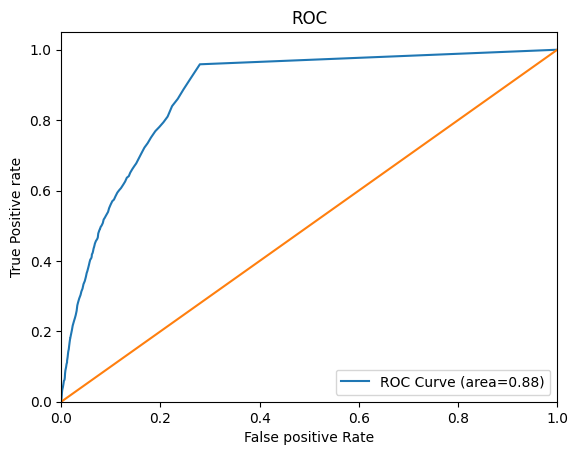

In [ ]:
plt.figure()
plt.plot(fpr,tpr,label="ROC Curve (area=%0.2f)"% roc_auc)
plt.plot([0,1],[0,1])
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False positive Rate")
plt.ylabel("True Positive rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

## Data Visualization

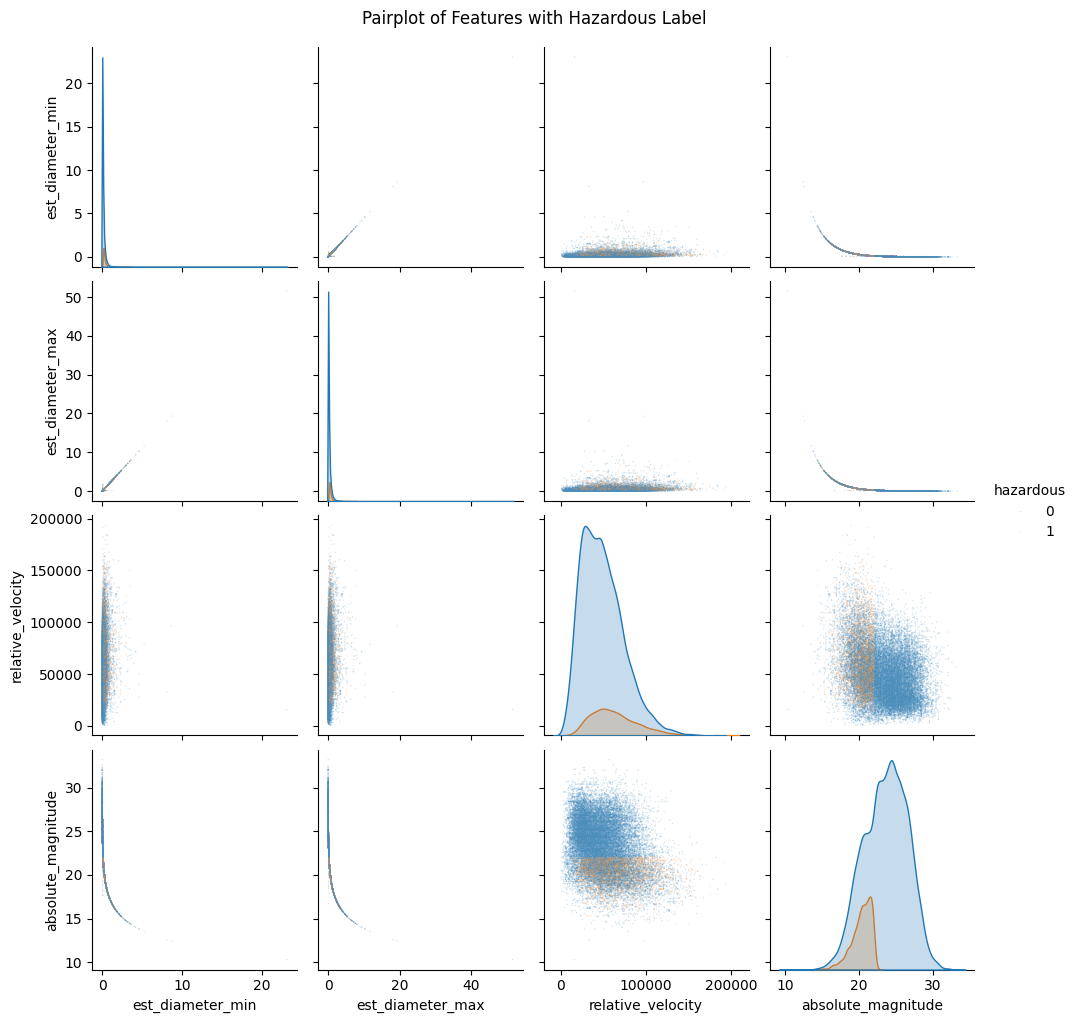

In [ ]:
sns.pairplot(df,plot_kws = {'alpha': 0.2, 's': 1},hue='hazardous')  #alpha- transparency value for the points0
plt.suptitle('Pairplot of Features with Hazardous Label',y=1.02)
plt.show()

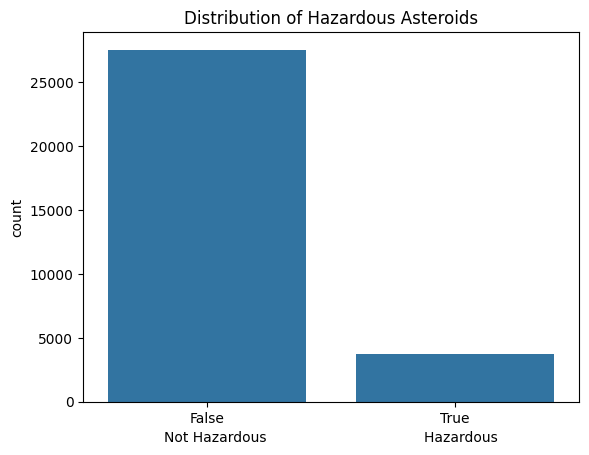

In [ ]:
sns.countplot(x='hazardous',data=df)
plt.title("Distribution of Hazardous Asteroids")
plt.xlabel("Not Hazardous                                    Hazardous")
plt.show()

### Plot distribution split by 'hazardous'

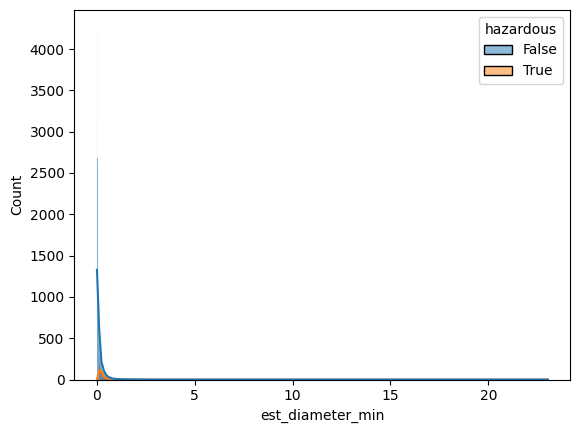

In [ ]:
sns.histplot(x='est_diameter_min',kde=True, hue='hazardous',data=df)
plt.show()

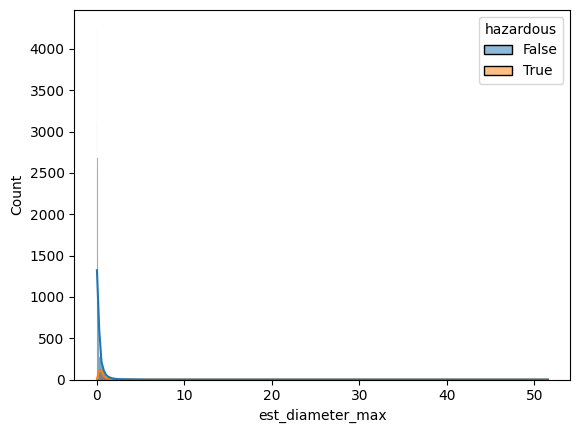

In [ ]:
sns.histplot(x='est_diameter_max',kde=True, hue='hazardous',data=df)
plt.show()


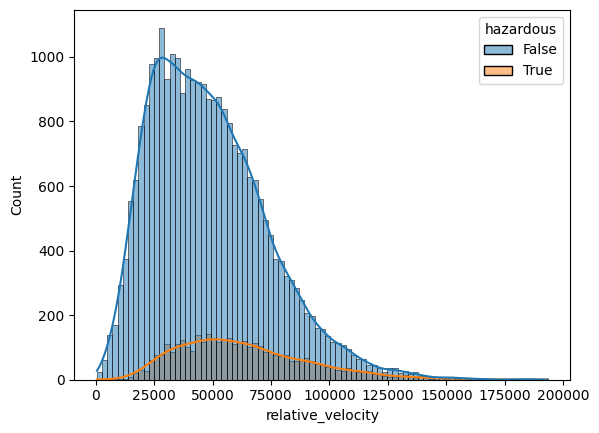

In [ ]:
sns.histplot(x='relative_velocity',kde=True, hue='hazardous',data=df)
plt.show()


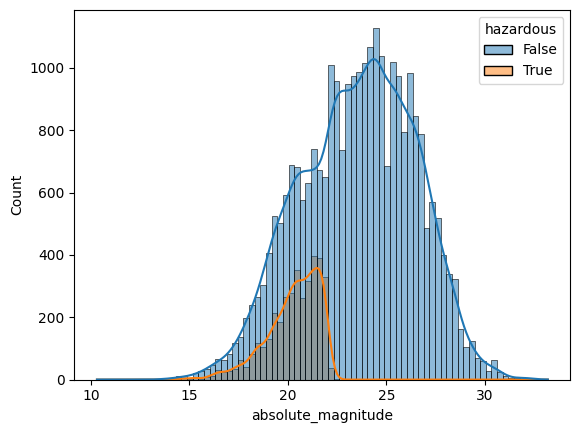

In [ ]:
sns.histplot(x='absolute_magnitude',kde=True, hue='hazardous',data=df)
plt.show()


In [ ]:
import pickle
pickle.dump(rf_os,open("Nasa.sav","wb"))


In [ ]:
pickle.dump(scaler2,open("MinmaxScaler1.sav","wb"))